In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,include_raw,model,fi,splitting_strategy,train_size,fi_time,MSE_before_ablation,MSE_after_ablation_1,MSE_after_ablation_2,MSE_after_ablation_3,MSE_after_ablation_4,MSE_after_ablation_5,MSE_after_ablation_6,MSE_after_ablation_7,MSE_after_ablation_8,MSE_after_ablation_9,MSE_after_ablation_10,ablation_time,test_size,split_seed,index,var,true_support
0,NaN,None,0,100,5,0.33,NaN,RF,LFI_with_raw,train-test,296,1.199632,3619.599028,4580.028277,5548.659987,5854.674974,6126.263063,6338.787683,6351.152322,6541.476603,6615.256987,6656.356208,6806.923240,0.043571,146,331,0,0,1.0
1,NaN,None,0,100,5,0.33,False,RF,LFI_without_raw,train-test,296,0.841487,3619.599028,4728.629209,5347.715345,5661.652901,6208.812930,6243.620171,6527.915121,6572.073224,6689.115517,6783.304048,6806.923240,0.039373,146,331,1,0,1.0
2,NaN,None,0,100,5,0.33,NaN,RF,LIME,train-test,296,4.999835,3619.599028,4774.388870,5788.690037,6078.958297,6490.549753,6716.195404,6824.476580,6838.057297,6839.258840,6777.842559,6806.923240,0.049252,146,331,2,0,1.0
3,NaN,None,0,100,5,0.33,NaN,RF,TreeSHAP,train-test,296,0.040945,3619.599028,4504.767393,5603.591277,5983.559731,6297.457902,6508.006221,6611.796754,6525.979085,6632.111300,6787.840972,6806.923240,0.045733,146,331,3,0,1.0
4,NaN,None,1,100,5,0.33,NaN,RF,LFI_with_raw,train-test,296,1.096433,3619.599028,4508.742806,5562.786089,6073.937815,6366.287272,6540.029625,6601.923675,6697.387144,6723.893567,6791.476689,6866.734924,0.042997,146,331,4,0,1.0
5,NaN,None,1,100,5,0.33,False,RF,LFI_without_raw,train-test,296,0.870746,3619.599028,4269.756662,5502.954683,5797.931058,6320.494031,6685.222891,6750.137525,6788.280845,6813.975797,6815.188191,6866.734924,0.038769,146,331,5,0,1.0
6,NaN,None,1,100,5,0.33,NaN,RF,LIME,train-test,296,4.779202,3619.599028,4663.336814,5706.635900,6004.044557,6465.964115,6497.526947,6626.514285,6641.687334,6742.429221,6854.215130,6866.734924,0.045514,146,331,6,0,1.0
7,NaN,None,1,100,5,0.33,NaN,RF,TreeSHAP,train-test,296,0.037710,3619.599028,4524.560624,5675.164138,6099.502018,6254.150153,6483.581667,6630.292524,6748.430940,6781.776063,6827.968442,6866.734924,0.042208,146,331,7,0,1.0
8,NaN,None,2,100,5,0.33,NaN,RF,LFI_with_raw,train-test,296,1.134007,3619.599028,5050.052979,6390.338525,6973.698069,7149.837179,7305.319138,7404.152580,7529.800576,7521.434121,7533.584679,7539.142497,0.043859,146,331,8,0,1.0
9,NaN,None,2,100,5,0.33,False,RF,LFI_without_raw,train-test,296,0.907211,3619.599028,5039.997127,6062.879600,6703.268461,7027.250659,7131.878525,7524.306537,7481.157516,7445.755909,7441.494108,7539.142497,0.044229,146,331,9,0,1.0


In [4]:
# Print the run-time of the feature importance algorithm
df[["fi","fi_time"]]

,fi,fi_time
0,LFI_with_raw,1.199632
1,LFI_without_raw,0.841487
2,LIME,4.999835
3,TreeSHAP,0.040945
4,LFI_with_raw,1.096433
5,LFI_without_raw,0.870746
6,LIME,4.779202
7,TreeSHAP,0.037710
8,LFI_with_raw,1.134007
9,LFI_without_raw,0.907211


In [5]:
#################### Change the following according to the dataset ####################
num_features = 10
task = "regression" # task = "classification"
########################################################################################
methods = ["LFI_with_raw","LFI_without_raw","TreeSHAP", "LIME"]
nreps = df["rep"].max()
n_testsize = df[['train_size', 'test_size']].drop_duplicates()
metrics = {"regression": "MSE", "classification": "AUC"}
results = {}

for m in methods:
    results[m] = {}
    for r in range(nreps+1):
        results[m][r] = []

In [6]:
for m in methods:
    for r in range(nreps+1):
        df_sub = df[(df["fi"] == m) & (df["rep"] == r)]
        assert len(df_sub[metrics[task]+"_before_ablation"].unique()) == 1
        results[m][r].append(df_sub[metrics[task]+"_before_ablation"].unique()[0])
        for i in range(num_features):
            assert len(df_sub[metrics[task]+f"_after_ablation_{i+1}"].unique()) == 1
            results[m][r].append(df_sub[metrics[task]+f"_after_ablation_{i+1}"].unique()[0])

In [7]:
agg_results = {} 
for m in methods:
    agg_results[m] = None

In [8]:
for m in methods:
    result = []
    for f in range(num_features+1):
        result.append(np.mean([results[m][r][f] for r in range(nreps+1)]))          
    agg_results[m] = result

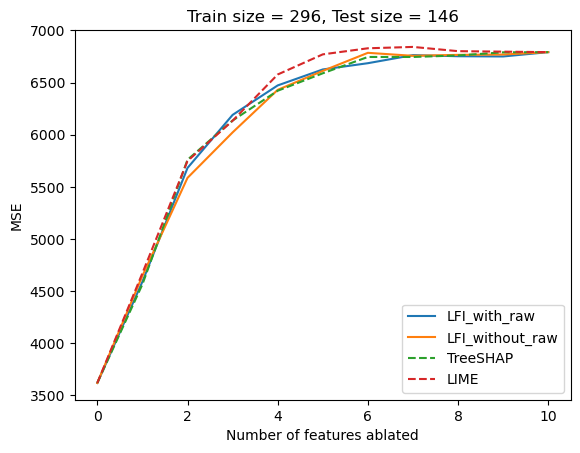

In [9]:
# Plotting
fig, ax = plt.subplots()
for m in methods:
    if m in ["TreeSHAP", "LIME"]:
        ax.plot(range(num_features+1), agg_results[m], label=m, linestyle='dashed')
    else:
        ax.plot(range(num_features+1), agg_results[m], label=m)
ax.set(xlabel='Number of features ablated', ylabel=metrics[task],
        title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
ax.legend()
plt.show()